In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [81]:
!pip install ucimlrepo

In [82]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
parkinsons = fetch_ucirepo(id=174) 
  
# data (as pandas dataframes) 
X = parkinsons.data.features 
y = parkinsons.data.targets 
  
# metadata 
print(parkinsons.metadata) 
  
# variable information 
print(parkinsons.variables) 


{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'published_in': 'BioMedical Engineering OnLine', 'year': 2007, 'url': 'https://www.semanticscholar.org/paper/27e1dcd0d64bfc9d936e597d4f29b8

In [83]:
print(X)

     MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter  MDVP:RAP  \
0    119.992   157.302    74.997      0.00784      0.00784   0.00370   
1    122.400   148.650   113.819      0.00968      0.00968   0.00465   
2    116.682   131.111   111.555      0.01050      0.01050   0.00544   
3    116.676   137.871   111.366      0.00997      0.00997   0.00502   
4    116.014   141.781   110.655      0.01284      0.01284   0.00655   
..       ...       ...       ...          ...          ...       ...   
190  174.188   230.978    94.261      0.00459      0.00459   0.00263   
191  209.516   253.017    89.488      0.00564      0.00564   0.00331   
192  174.688   240.005    74.287      0.01360      0.01360   0.00624   
193  198.764   396.961    74.904      0.00740      0.00740   0.00370   
194  214.289   260.277    77.973      0.00567      0.00567   0.00295   

     MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer  ...  MDVP:APQ  \
0     0.00554     0.01109       0.04374       0.04374  ...   0.

In [84]:
print(y)

     status
0         1
1         1
2         1
3         1
4         1
..      ...
190       0
191       0
192       0
193       0
194       0

[195 rows x 1 columns]


In [85]:
X.describe()

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.006220,0.003306,0.003446,0.009920,0.029709,0.029709,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.004848,0.002968,0.002759,0.008903,0.018857,0.018857,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.001680,0.000680,0.000920,0.002040,0.009540,0.009540,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.003460,0.001660,0.001860,0.004985,0.016505,0.016505,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.004940,0.002500,0.002690,0.007490,0.022970,0.022970,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.007365,0.003835,0.003955,0.011505,0.037885,0.037885,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.033160,0.021440,0.019580,0.064330,0.119080,0.119080,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:Fo       195 non-null    float64
 1   MDVP:Fhi      195 non-null    float64
 2   MDVP:Flo      195 non-null    float64
 3   MDVP:Jitter   195 non-null    float64
 4   MDVP:Jitter   195 non-null    float64
 5   MDVP:RAP      195 non-null    float64
 6   MDVP:PPQ      195 non-null    float64
 7   Jitter:DDP    195 non-null    float64
 8   MDVP:Shimmer  195 non-null    float64
 9   MDVP:Shimmer  195 non-null    float64
 10  Shimmer:APQ3  195 non-null    float64
 11  Shimmer:APQ5  195 non-null    float64
 12  MDVP:APQ      195 non-null    float64
 13  Shimmer:DDA   195 non-null    float64
 14  NHR           195 non-null    float64
 15  HNR           195 non-null    float64
 16  RPDE          195 non-null    float64
 17  DFA           195 non-null    float64
 18  spread1       195 non-null    

In [87]:
X.isnull().sum()

MDVP:Fo         0
MDVP:Fhi        0
MDVP:Flo        0
MDVP:Jitter     0
MDVP:Jitter     0
MDVP:RAP        0
MDVP:PPQ        0
Jitter:DDP      0
MDVP:Shimmer    0
MDVP:Shimmer    0
Shimmer:APQ3    0
Shimmer:APQ5    0
MDVP:APQ        0
Shimmer:DDA     0
NHR             0
HNR             0
RPDE            0
DFA             0
spread1         0
spread2         0
D2              0
PPE             0
dtype: int64

In [88]:
X.duplicated().sum()

0

In [89]:
X.notnull()

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
191,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
192,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
193,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


**Logistic Regression**

Training Accuracy: 0.8653846153846154
Testing Accuracy: 0.8974358974358975


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


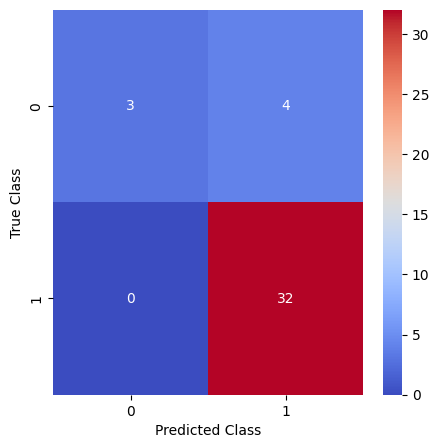

Precision: 0.8888888888888888
Sensitivity: 1.0
Specificity: 0.42857142857142855
F1-score: 0.9411764705882353


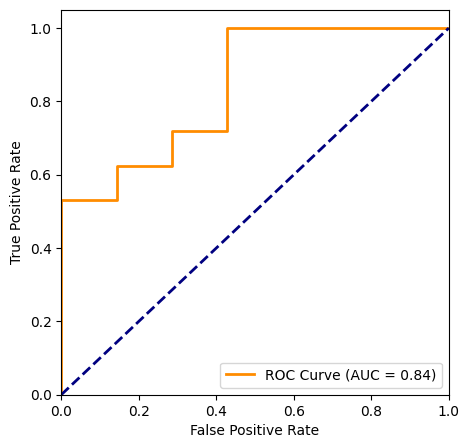

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Ensure y is a 1D array
#y = y.ravel()  # No need for .values, just ravel() if y is already a NumPy array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression model with increased iterations
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('LR_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('LR_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Decision Tree**

Training Accuracy: 1.0
Testing Accuracy: 0.9230769230769231


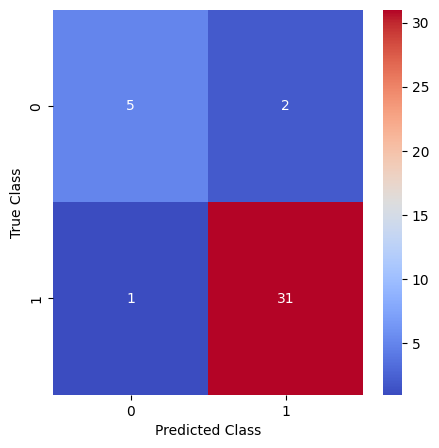

Precision: 0.9393939393939394
Sensitivity: 0.96875
Specificity: 0.7142857142857143
F1-score: 0.9538461538461539


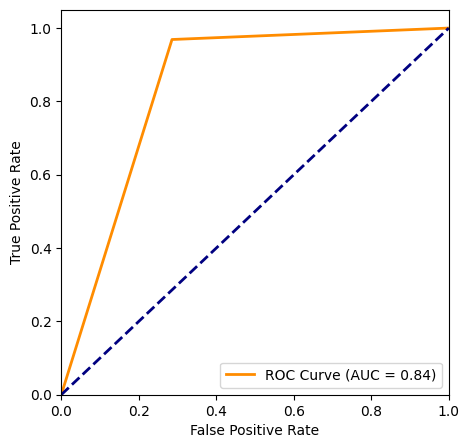

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = decision_tree_model.predict(X_train_scaled)
y_test_pred = decision_tree_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('DT_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('DT_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Random Forest**

Training Accuracy: 1.0
Testing Accuracy: 0.9487179487179487


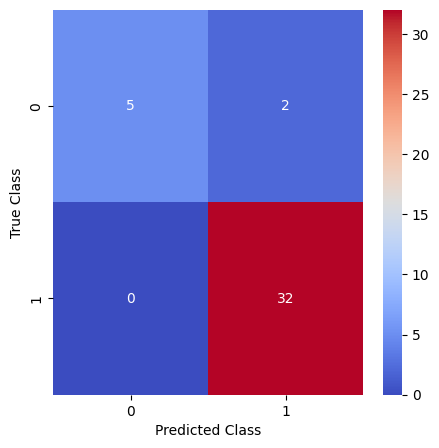

Precision: 0.9411764705882353
Sensitivity: 1.0
Specificity: 0.7142857142857143
F1-score: 0.9696969696969697


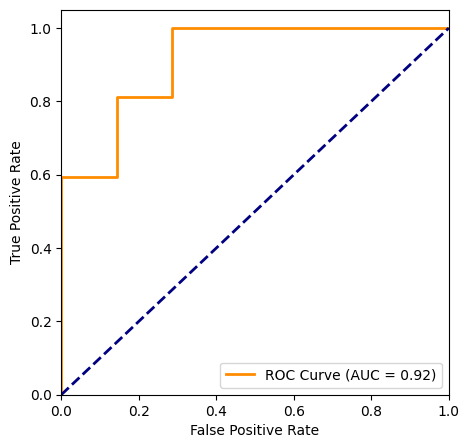

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = random_forest_model.predict(X_train_scaled)
y_test_pred = random_forest_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('RF_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('RF_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**KNN**

Training Accuracy: 0.9487179487179487
Testing Accuracy: 0.9487179487179487


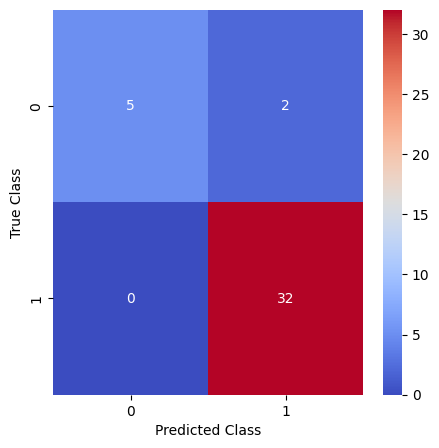

Precision: 0.9411764705882353
Sensitivity: 1.0
Specificity: 0.7142857142857143
F1-score: 0.9696969696969697


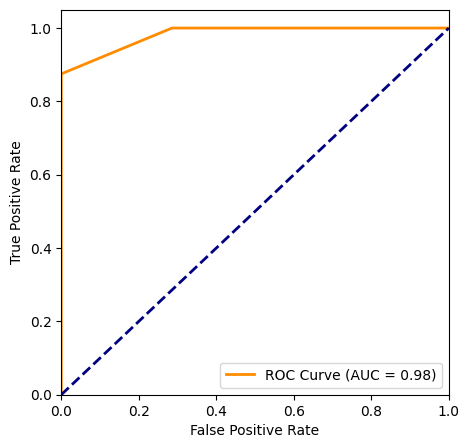

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('KNN_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('KNN_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**SVM**

Training Accuracy: 0.8974358974358975
Testing Accuracy: 0.8974358974358975


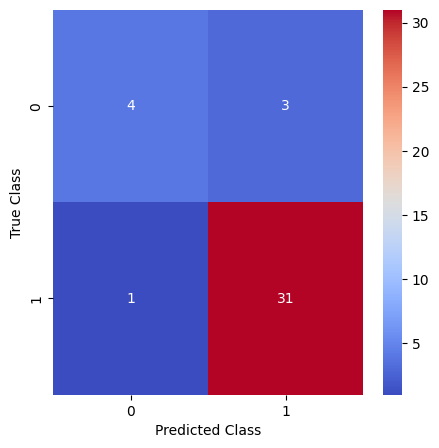

Precision: 0.9117647058823529
Sensitivity: 0.96875
Specificity: 0.5714285714285714
F1-score: 0.9393939393939394


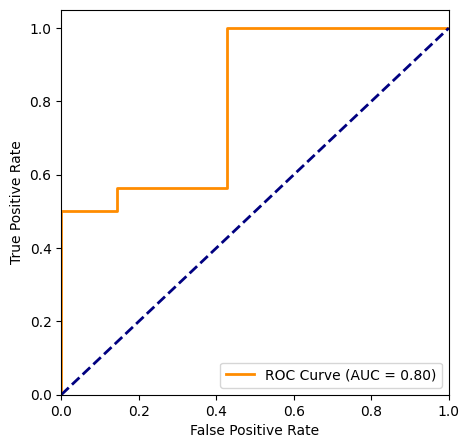

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Support Vector Machine classifier
svm_model = SVC(kernel='linear', C = 1.0, probability=True, random_state=42)  # Use linear kernel, enable probability estimates
svm_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('SVM_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('SVM_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Gaussian Naive Bayes**

Training Accuracy: 0.6923076923076923
Testing Accuracy: 0.717948717948718


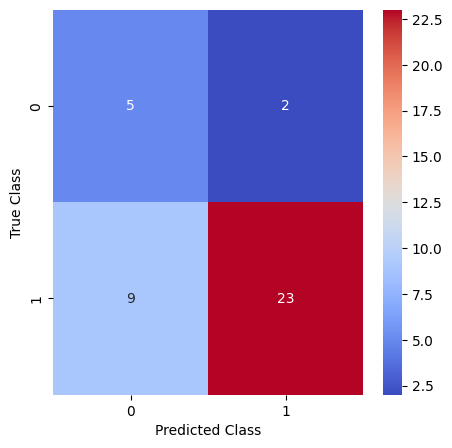

Precision: 0.92
Sensitivity: 0.71875
Specificity: 0.7142857142857143
F1-score: 0.8070175438596492


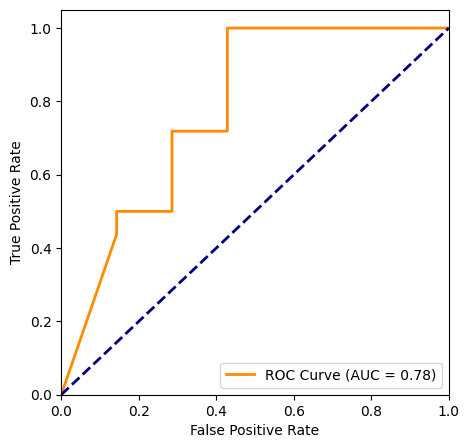

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional for Naive Bayes, but done for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Gaussian Naive Bayes classifier
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = gnb_model.predict(X_train_scaled)
y_test_pred = gnb_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('GNB_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gnb_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, gnb_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('GNB_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**MLP**

Training Accuracy: 1.0
Testing Accuracy: 0.9487179487179487


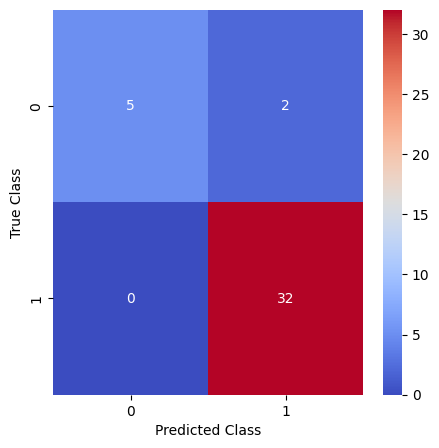

Precision: 0.9411764705882353
Sensitivity: 1.0
Specificity: 0.7142857142857143
F1-score: 0.9696969696969697


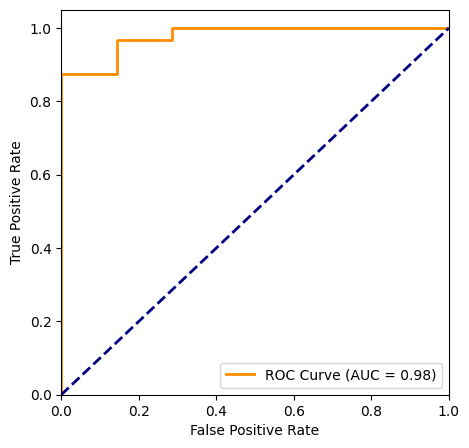

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Multi-Layer Perceptron classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = mlp_model.predict(X_train_scaled)
y_test_pred = mlp_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('MLP_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, mlp_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('MLP_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**XGBoost**

Training Accuracy: 1.0
Testing Accuracy: 0.9487179487179487


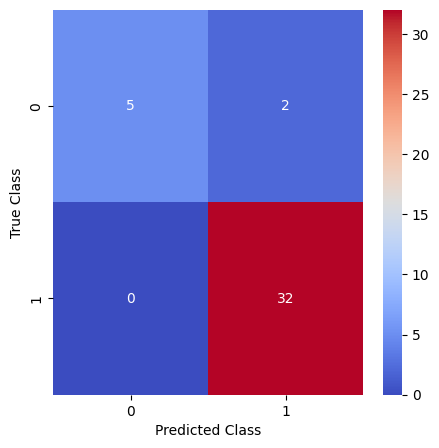

Precision: 0.9411764705882353
Sensitivity: 1.0
Specificity: 0.7142857142857143
F1-score: 0.9696969696969697


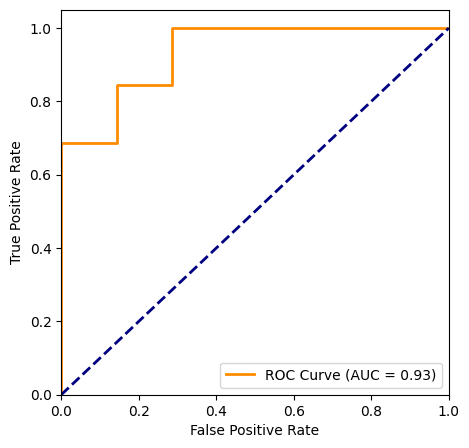

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train an XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
#xgb_model = XGBClassifier(
    #n_estimators=100,
    #random_state=21,
    #max_depth=7,  # Limit tree depth
    #min_child_weight=1,  # Minimum sum of instance weight (hessian) needed in a child
    #gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    #subsample=0.8,  # Fraction of samples used for training
    #colsample_bytree=0.8,  # Fraction of features used for training
    #reg_alpha=0.1,  # L1 regularization term on weights
    #reg_lambda=1.0  # L2 regularization term on weights
#)
xgb_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('XGB_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('XGB_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**AdaBoost**

Training Accuracy: 1.0
Testing Accuracy: 0.8461538461538461


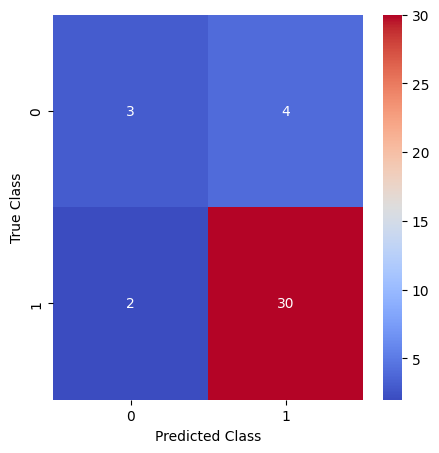

Precision: 0.8823529411764706
Sensitivity: 0.9375
Specificity: 0.42857142857142855
F1-score: 0.9090909090909091


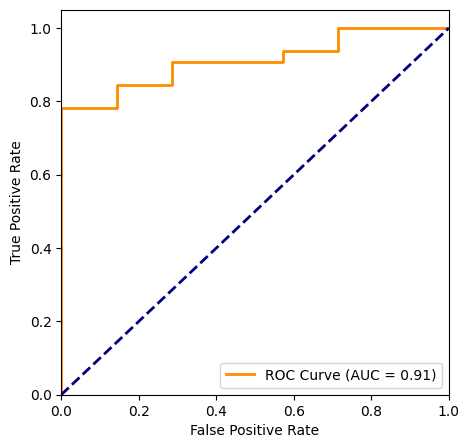

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train an AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = ada_model.predict(X_train_scaled)
y_test_pred = ada_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('AdaBoost_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ada_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, ada_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('AdaBoost_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Stochastic Gradient Classifier**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Training Accuracy: 0.8333333333333334
Testing Accuracy: 0.7692307692307693


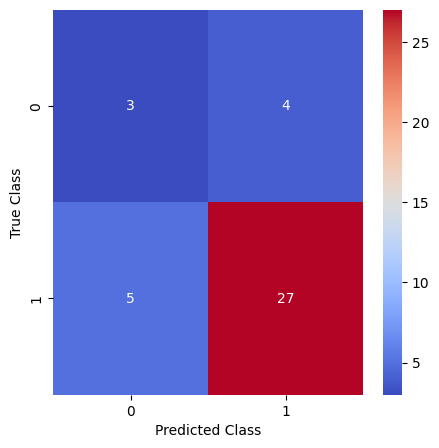

Precision: 0.8709677419354839
Sensitivity: 0.84375
Specificity: 0.42857142857142855
F1-score: 0.8571428571428571


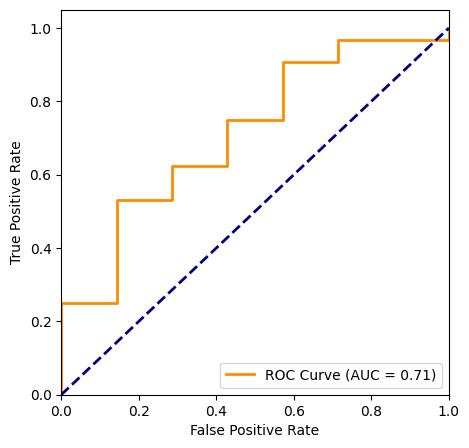

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train an SGD classifier
sgd_model = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = sgd_model.predict(X_train_scaled)
y_test_pred = sgd_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('SGD_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, sgd_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, sgd_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('SGD_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Gradient Boosting Classifier**

Training Accuracy: 1.0
Testing Accuracy: 0.9487179487179487


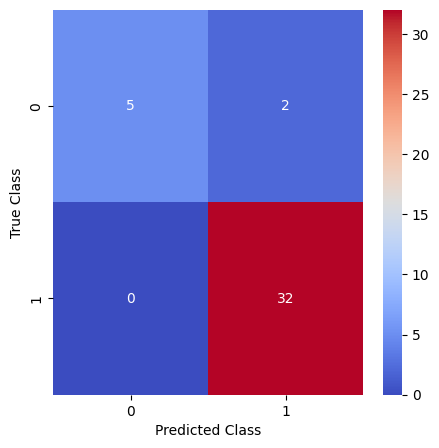

Precision: 0.9411764705882353
Sensitivity: 1.0
Specificity: 0.7142857142857143
F1-score: 0.9696969696969697


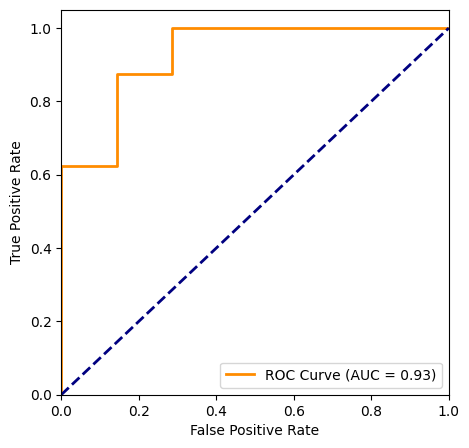

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = gbc_model.predict(X_train_scaled)
y_test_pred = gbc_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('GBC_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gbc_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, gbc_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('GBC_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Extra Tree Classifier**

Training Accuracy: 1.0
Testing Accuracy: 0.9487179487179487


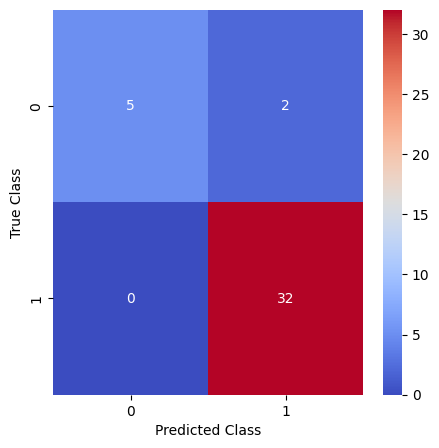

Precision: 0.9411764705882353
Sensitivity: 1.0
Specificity: 0.7142857142857143
F1-score: 0.9696969696969697


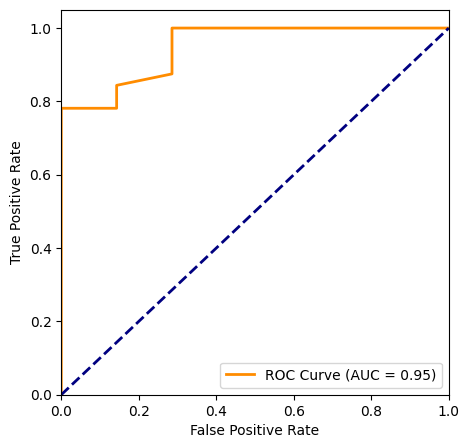

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train an Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier(n_estimators=100, max_depth=None, random_state=42)
extra_trees_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = extra_trees_model.predict(X_train_scaled)
y_test_pred = extra_trees_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('ETC_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, extra_trees_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, extra_trees_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('ETC_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**LightGBM**

[LightGBM] [Info] Number of positive: 115, number of negative: 41
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.737179 -> initscore=1.031360
[LightGBM] [Info] Start training from score 1.031360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

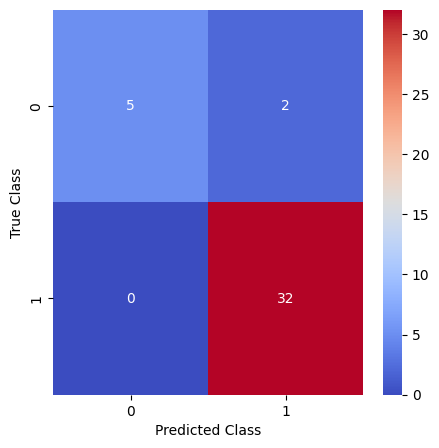

Precision: 0.9411764705882353
Sensitivity: 1.0
Specificity: 0.7142857142857143
F1-score: 0.9696969696969697


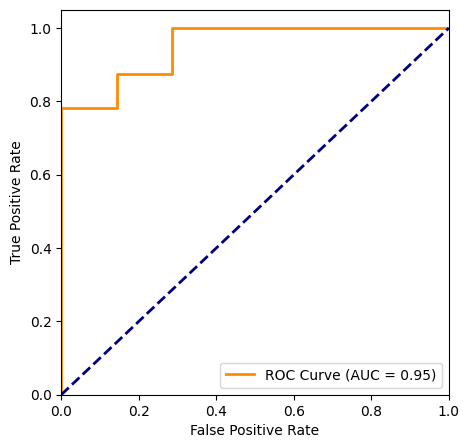

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a LightGBM classifier
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.5, num_leaves=31, random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = lgb_model.predict(X_train_scaled)
y_test_pred = lgb_model.predict(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('LGBM_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lgb_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('LGBM_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**CatBoost**

Training Accuracy: 1.0
Testing Accuracy: 0.9487179487179487


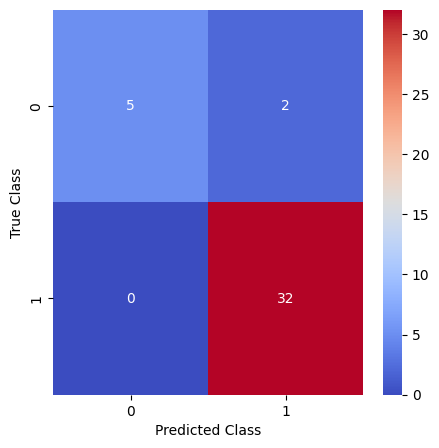

Precision: 0.9411764705882353
Sensitivity: 1.0
Specificity: 0.7142857142857143
F1-score: 0.9696969696969697


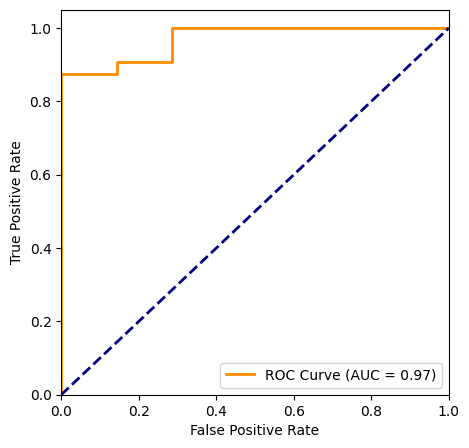

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier, Pool

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a CatBoost classifier
catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.5,
    depth=7,
    random_state=42,
    verbose=0  # Suppress verbose output
)
catboost_model.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = catboost_model.predict(X_train_scaled)
y_test_pred = catboost_model.predict(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('CatBoost_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, catboost_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('CatBoost_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Bernoulli Naive Bayes**

Training Accuracy: 0.7243589743589743
Testing Accuracy: 0.7435897435897436


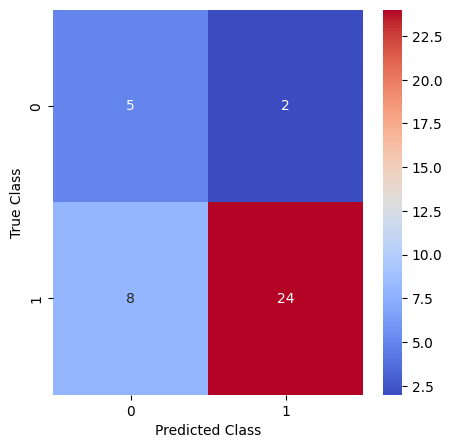

Precision: 0.9230769230769231
Sensitivity: 0.75
Specificity: 0.7142857142857143
F1-score: 0.8275862068965517


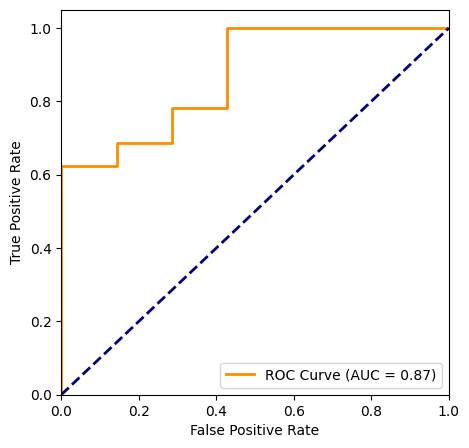

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if applicable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Bernoulli Naive Bayes classifier
bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = bernoulli_nb_model.predict(X_train_scaled)
y_test_pred = bernoulli_nb_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('BernoulliNB_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, bernoulli_nb_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, bernoulli_nb_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('BernoulliNB_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Complement Naive Bayes**

Training Accuracy: 0.7371794871794872
Testing Accuracy: 0.6923076923076923


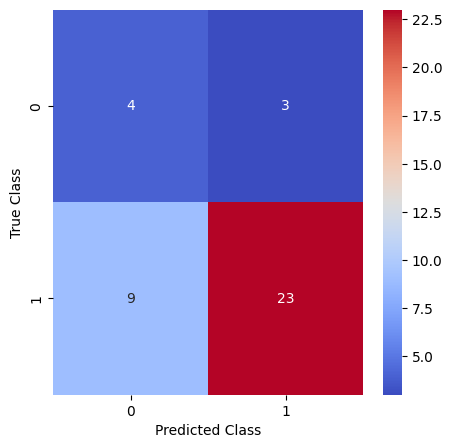

Precision: 0.8846153846153846
Sensitivity: 0.71875
Specificity: 0.5714285714285714
F1-score: 0.7931034482758621


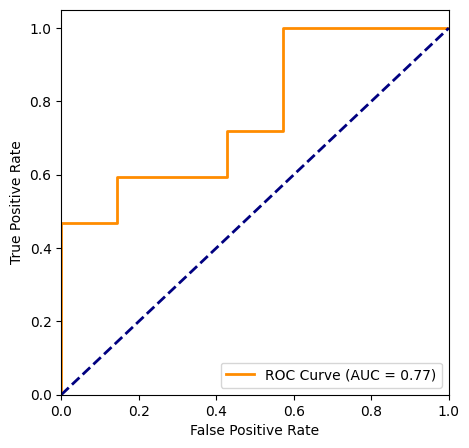

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import ComplementNB

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using MinMaxScaler to ensure non-negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Complement Naive Bayes classifier
complement_nb_model = ComplementNB()
complement_nb_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = complement_nb_model.predict(X_train_scaled)
y_test_pred = complement_nb_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('ComplementNB_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, complement_nb_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, complement_nb_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('ComplementNB_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Multinomial Naive Bayes**

Training Accuracy: 0.8205128205128205
Testing Accuracy: 0.8974358974358975


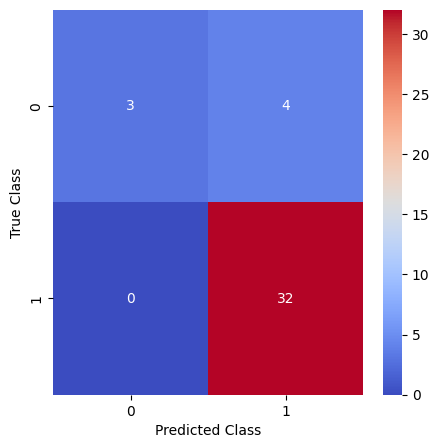

Precision: 0.8888888888888888
Sensitivity: 1.0
Specificity: 0.42857142857142855
F1-score: 0.9411764705882353


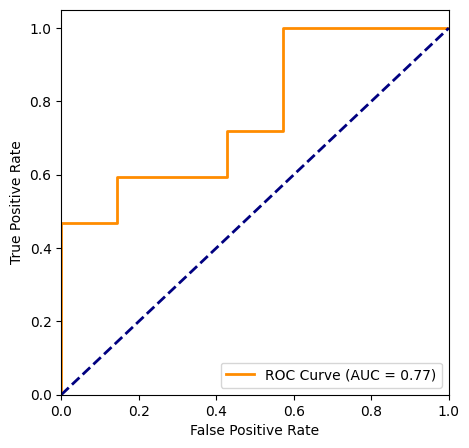

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using MinMaxScaler to ensure non-negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Multinomial Naive Bayes classifier
multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = multinomial_nb_model.predict(X_train_scaled)
y_test_pred = multinomial_nb_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('MultinomialNB_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, multinomial_nb_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, multinomial_nb_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('MultinomialNB_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**One VS Rest Classifier**

Training Accuracy: 0.26282051282051283
Testing Accuracy: 0.1794871794871795


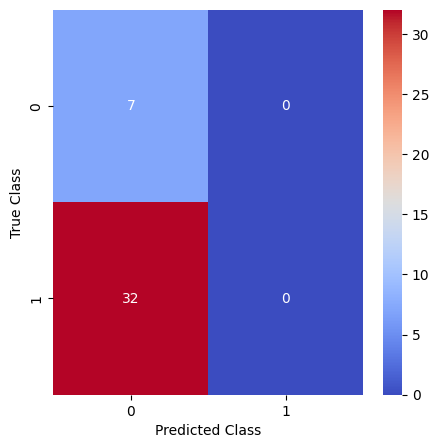

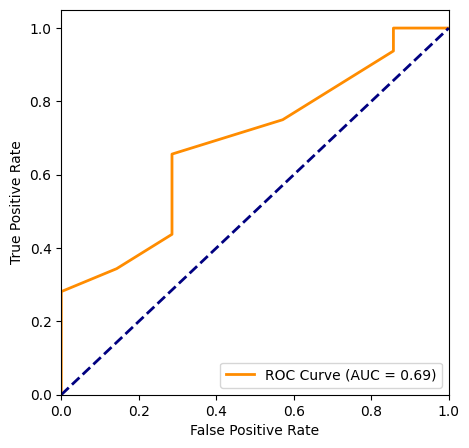

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class CustomBinaryOneVsRestClassifier:
    def __init__(self):
        self.threshold = None

    def fit(self, X, y):
        # Create a binary target for the positive class (1) and negative class (0)
        # Calculate a simple threshold for demonstration purposes
        # Here we use the mean of the features for class 1 as the threshold
        self.threshold = np.mean(X[y == 1], axis=0)
    
    def predict(self, X):
        # Predict based on whether the features exceed the threshold
        return np.all(X >= self.threshold, axis=1).astype(int)
    
    def predict_proba(self, X):
        # Probability based on how many features exceed the threshold
        return np.mean(X >= self.threshold, axis=1)

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Custom Binary OneVsRest classifier
custom_ovr_model = CustomBinaryOneVsRestClassifier()
custom_ovr_model.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = custom_ovr_model.predict(X_train_scaled)
y_test_pred = custom_ovr_model.predict(X_test_scaled)
y_train_proba = custom_ovr_model.predict_proba(X_train_scaled)
y_test_proba = custom_ovr_model.predict_proba(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('CustomBinaryOneVsRest_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('CustomBinaryOneVsRest_ROC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Histogram based Gradient Boosting**

Training Accuracy: 1.0
Testing Accuracy: 0.9230769230769231


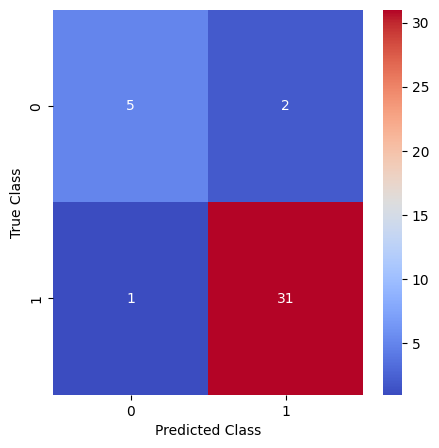

Precision: 0.9393939393939394
Sensitivity: 0.96875
Specificity: 0.7142857142857143
F1-score: 0.9538461538461539


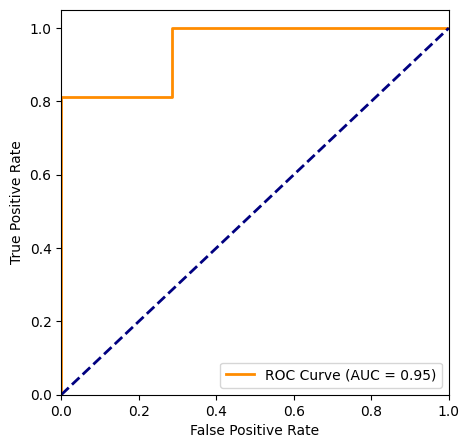

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Histogram-based Gradient Boosting classifier
hist_gb_model = HistGradientBoostingClassifier(
    max_iter=100,
    learning_rate=0.5,
    max_depth=5,
    random_state=42
)
hist_gb_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = hist_gb_model.predict(X_train_scaled)
y_test_pred = hist_gb_model.predict(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('HistGB_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, hist_gb_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, hist_gb_model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('HistGB_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Nearest Centroid**

Training Accuracy: 0.7371794871794872
Testing Accuracy: 0.7435897435897436


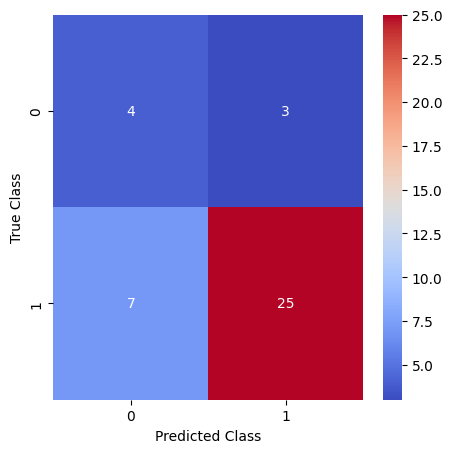

Precision: 0.8928571428571429
Sensitivity: 0.78125
Specificity: 0.5714285714285714
F1-score: 0.8333333333333334


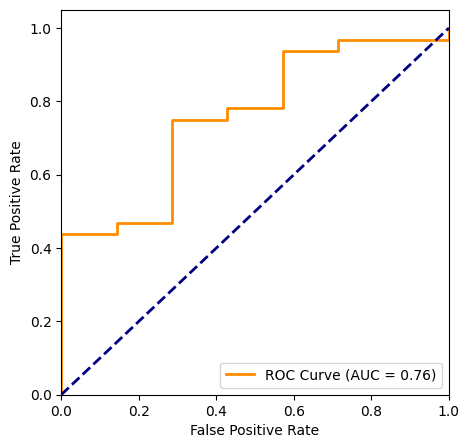

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid
import numpy as np

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Nearest Centroid classifier
nearest_centroid_model = NearestCentroid()
nearest_centroid_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = nearest_centroid_model.predict(X_train_scaled)
y_test_pred = nearest_centroid_model.predict(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
#plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('NearestCentroid_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Compute distances to centroids
distances = np.linalg.norm(X_test_scaled[:, np.newaxis] - nearest_centroid_model.centroids_, axis=2)

# For binary classification, use the distances to the centroid of the positive class
# Assuming class 1 is the positive class
scores = -distances[:, 1]  # Invert the distances to get larger values as higher confidence

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, scores)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('NearestCentroid_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Radius Neighbors Classifier**

Training Accuracy: 0.7371794871794872
Testing Accuracy: 0.8205128205128205


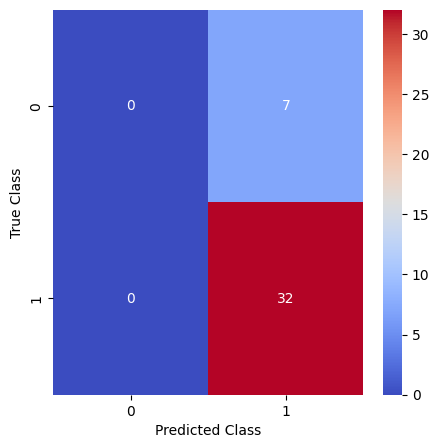

Precision: 0.8205128205128205
Sensitivity: 1.0
Specificity: 0.0
F1-score: 0.9014084507042254


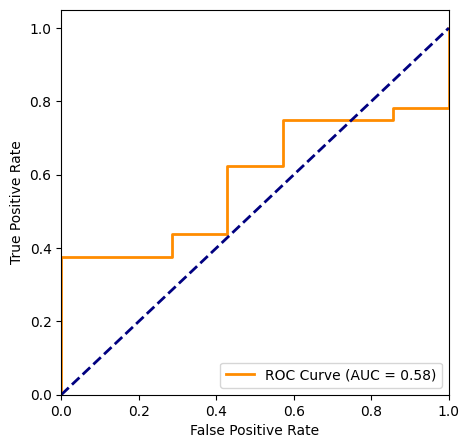

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Radius Neighbors Classifier
radius_neighbors_model = RadiusNeighborsClassifier(radius=100.0, outlier_label=0)  # Adjust radius as needed
radius_neighbors_model.fit(X_train_scaled, y_train)  # Use scaled data for fitting

# Make predictions on the training and testing sets
y_train_pred = radius_neighbors_model.predict(X_train_scaled)
y_test_pred = radius_neighbors_model.predict(X_test_scaled)  # Use scaled data for prediction

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('RadiusNeighbors_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

import numpy as np

# Compute distances to neighbors
distances, _ = radius_neighbors_model.radius_neighbors(X_test_scaled)

# Compute the average distance to positive class neighbors, handling empty distances
distances_to_positive = np.array([np.mean(d) if len(d) > 0 else np.inf for d in distances])
scores = -distances_to_positive  # Invert distances so that closer neighbors give higher scores

# Filter out infinity values (i.e., samples with no neighbors within the radius)
finite_mask = np.isfinite(scores)
filtered_y_test = y_test[finite_mask]
filtered_scores = scores[finite_mask]

# Calculate the ROC curve using the filtered scores
fpr, tpr, thresholds = roc_curve(filtered_y_test, filtered_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(filtered_y_test, filtered_scores)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('RadiusNeighbors_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()



**Logistic Regression with ElasticNet Regularization**

Training Accuracy: 0.8525641025641025
Testing Accuracy: 0.8974358974358975


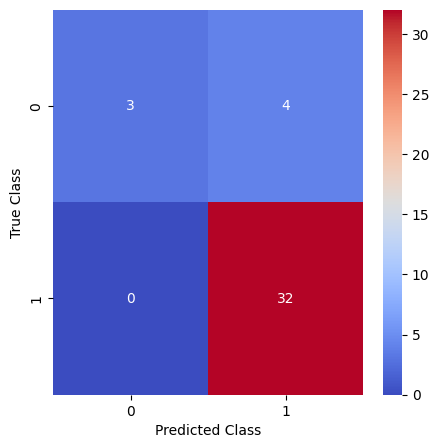

Precision: 0.8888888888888888
Sensitivity: 1.0
Specificity: 0.42857142857142855
F1-score: 0.9411764705882353


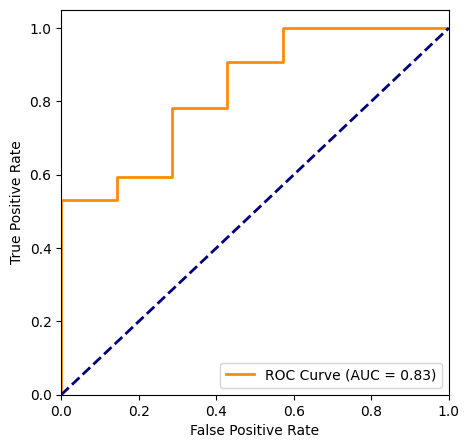

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression with ElasticNet regularization
logistic_elastic_net = LogisticRegression(
    penalty='elasticnet', solver='saga', max_iter=1000, 
    l1_ratio=0.5,  # Balance between L1 and L2 regularization (0.5 means equal contribution)
    C=1.0, random_state=42
)
logistic_elastic_net.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = logistic_elastic_net.predict(X_train_scaled)
y_test_pred = logistic_elastic_net.predict(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('LogRegElasticNet_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_elastic_net.predict_proba(X_test_scaled)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, logistic_elastic_net.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('LogRegElasticNet_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Extreme Learning Machine**

Training Accuracy: 0.9935897435897436
Testing Accuracy: 0.8205128205128205


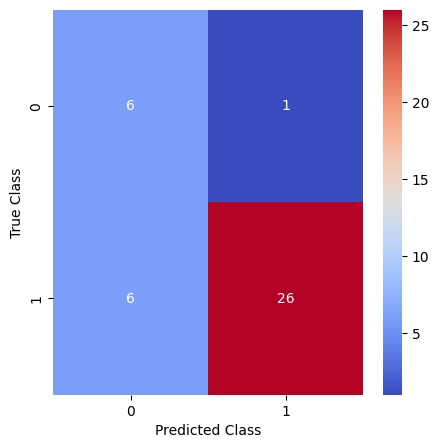

Precision: 0.9629629629629629
Sensitivity: 0.8125
Specificity: 0.8571428571428571
F1-score: 0.8813559322033898


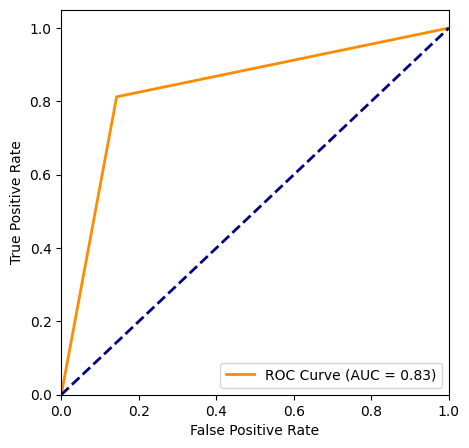

In [112]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Define the activation function (ReLU in this case)
def relu(x):
    return np.maximum(0, x)

# Define the Extreme Learning Machine (ELM) class
class ExtremeLearningMachine:
    def __init__(self, n_input, n_hidden, activation_function=relu):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.activation_function = activation_function
        self.input_weights = np.random.randn(self.n_input, self.n_hidden)
        self.biases = np.random.randn(self.n_hidden)

    def fit(self, X_train, y_train):
        H = self.activation_function(np.dot(X_train, self.input_weights) + self.biases)
        self.output_weights = np.dot(np.linalg.pinv(H), y_train)

    def predict(self, X):
        H = self.activation_function(np.dot(X, self.input_weights) + self.biases)
        y_pred = np.dot(H, self.output_weights)
        return np.where(y_pred >= 0.5, 1, 0)  # Threshold at 0.5 for binary classification

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Extreme Learning Machine
n_input = X_train_scaled.shape[1]
n_hidden = 100  # Number of hidden nodes, can be tuned
elm = ExtremeLearningMachine(n_input=n_input, n_hidden=n_hidden)
elm.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = elm.predict(X_train_scaled)
y_test_pred = elm.predict(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('ELM_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('ELM_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Ridge Classifier**

Training Accuracy: 0.9102564102564102
Testing Accuracy: 0.9230769230769231


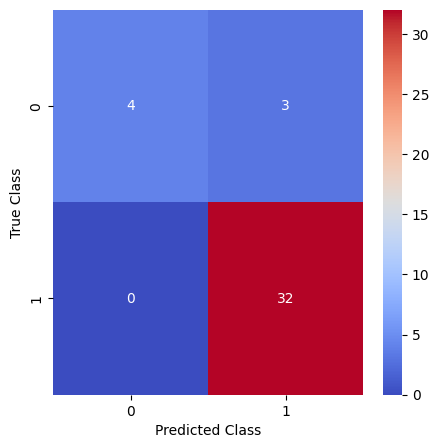

Precision: 0.9142857142857143
Sensitivity: 1.0
Specificity: 0.5714285714285714
F1-score: 0.955223880597015


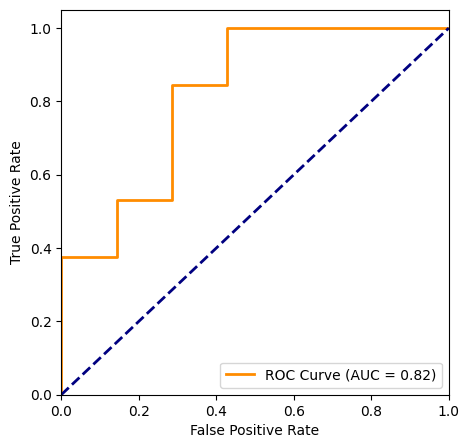

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Ridge Classifier
ridge_clf = RidgeClassifier(alpha=1.0, random_state=42)
ridge_clf.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = ridge_clf.predict(X_train_scaled)
y_test_pred = ridge_clf.predict(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('Ridge_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ridge_clf.decision_function(X_test_scaled))

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, ridge_clf.decision_function(X_test_scaled))

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('Ridge_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Huber Classifier**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training Accuracy: 0.7564102564102564
Testing Accuracy: 0.6410256410256411


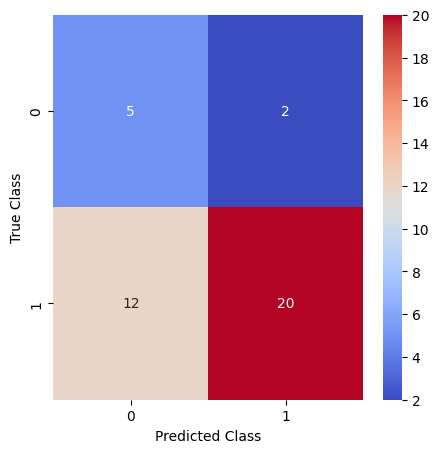

Precision: 0.9090909090909091
Sensitivity: 0.625
Specificity: 0.7142857142857143
F1-score: 0.7407407407407406


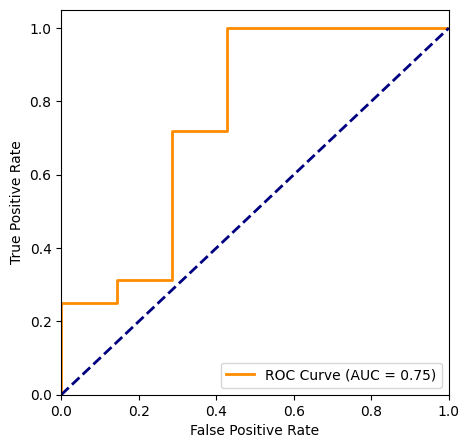

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Binarize the target for classification (HuberRegressor handles regression)
lb = LabelBinarizer()
y_binarized = lb.fit_transform(y).ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Huber Regressor
hub_regressor = HuberRegressor()
hub_regressor.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = hub_regressor.predict(X_train_scaled)
y_test_pred = hub_regressor.predict(X_test_scaled)

# Convert predictions to binary
y_train_pred_binary = (y_train_pred > 0.8).astype(int)
y_test_pred_binary = (y_test_pred > 0.8).astype(int)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
test_accuracy = accuracy_score(y_test, y_test_pred_binary)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred_binary)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('Huber_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('Huber_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Perceptron Classifier**

Training Accuracy: 0.8012820512820513
Testing Accuracy: 0.8717948717948718


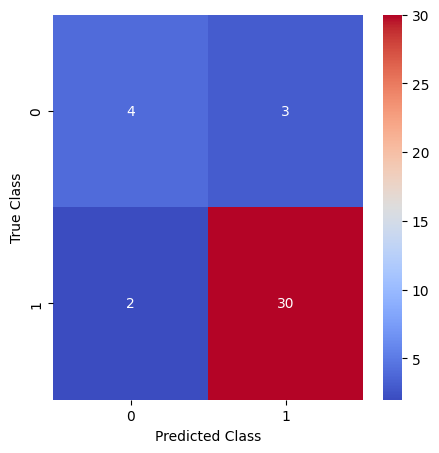

Precision: 0.9090909090909091
Sensitivity: 0.9375
Specificity: 0.5714285714285714
F1-score: 0.923076923076923


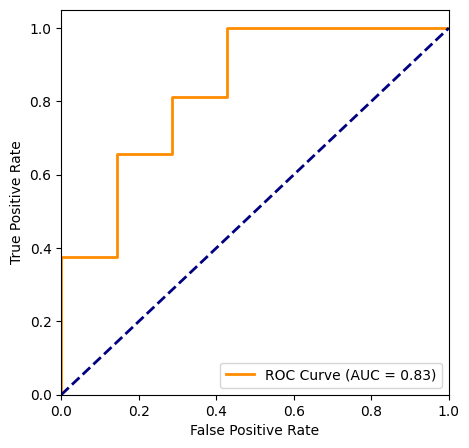

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Perceptron classifier
perceptron_model = Perceptron(max_iter=1000, random_state=42)
perceptron_model.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = perceptron_model.predict(X_train_scaled)
y_test_pred = perceptron_model.predict(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('Perceptron_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, perceptron_model.decision_function(X_test_scaled))

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, perceptron_model.decision_function(X_test_scaled))

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('Perceptron_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()


**Voting Classifier**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[LightGBM] [Info] Number of positive: 115, number of negative: 41
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.737179 -> initscore=1.031360
[LightGBM] [Info] Start training from score 1.031360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

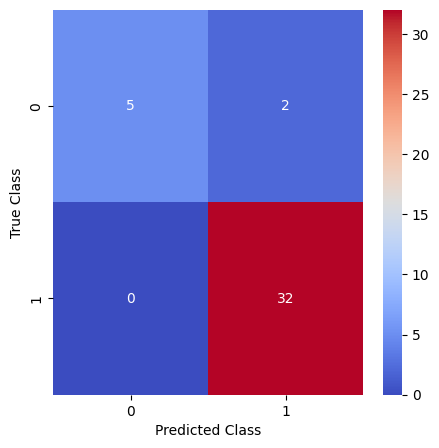

Precision: 0.9411764705882353
Sensitivity: 1.0
Specificity: 0.7142857142857143
F1-score: 0.9696969696969697


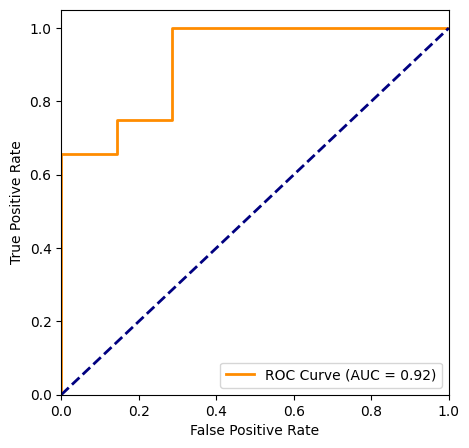

In [123]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert X and y to NumPy arrays if they are DataFrames
if hasattr(X, 'values'):
    X = X.values
if hasattr(y, 'values'):
    y = y.values.ravel()  # Convert DataFrame to NumPy array and ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize individual classifiers
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
sgd_model = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
extra_trees_model = ExtraTreesClassifier(n_estimators=100, max_depth=None, random_state=42)
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.5, num_leaves=31, random_state=42)
catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.5,
    depth=7,
    random_state=42,
    verbose=0  # Suppress verbose output
)
hist_gb_model = HistGradientBoostingClassifier(
    max_iter=100,
    learning_rate=0.5,
    max_depth=5,
    random_state=42
)
radius_neighbors_model = RadiusNeighborsClassifier(radius=100.0, outlier_label=0)
logistic_elastic_net = LogisticRegression(
    penalty='elasticnet', solver='saga', max_iter=1000, 
    l1_ratio=0.5,  # Balance between L1 and L2 regularization
    C=1.0, random_state=42
)

# Initialize the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('decision_tree', decision_tree_model),
        ('random_forest', random_forest_model),
        ('knn', knn_model),
        ('svm', svm_model),
        ('mlp', mlp_model),
        ('xgb', xgb_model),
        ('ada', ada_model),
        ('sgd', sgd_model),
        ('gbc', gbc_model),
        ('extra_trees', extra_trees_model),
        ('lgb', lgb_model),
        ('catboost', catboost_model),
        ('hist_gb', hist_gb_model),
        ('radius_neighbors', radius_neighbors_model),
        ('logistic_elastic_net', logistic_elastic_net)
    ],
    voting='soft'  # Use 'soft' voting to aggregate probabilities
)

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = voting_clf.predict(X_train_scaled)
y_test_pred = voting_clf.predict(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('Voting_Classifier_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()
plt.close()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
# For the ROC curve, we need to get the probability estimates for the positive class
# The voting classifier will aggregate probabilities from all the models
y_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('Voting_Classifier_AUC.png')  # Save the ROC curve as a PNG file
plt.show()
plt.close()
